# Dataset
This notebook shows information about the used dataset

### Setup

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow_datasets as tfds

import pandas as pd
from sklearn.model_selection import train_test_split

tfds.disable_progress_bar()
np.set_printoptions(precision=3, suppress=True)

Load datasets

In [2]:
def load_data_arrays():
  df_1 = pd.read_csv("../../datasets/1_no_stopwords.csv")
  df_3 = pd.read_csv("../../datasets/3_no_stopwords.csv")
  df_5 = pd.read_csv("../../datasets/5_no_stopwords.csv")
  df_6 = pd.read_csv("../../datasets/6_no_stopwords.csv")

  df = df_1.append(df_3)
  df = df.append(df_5)
  df = df.append(df_6)

  print(sorted(list(set(df['class'].values))))

  df = df[(df['is_hatespeech'] == 1)]

  train_df, test_df = train_test_split(df, test_size=0.2, random_state=42, shuffle=True, stratify=df["is_hatespeech"])

  return train_df, test_df

train_df, test_df = load_data_arrays()

[0, 1, 2, 3, 4, 5, 6, 7]


Plot data distribution

[29558, 3865, 68, 1089, 3340, 514, 15294, 8449]


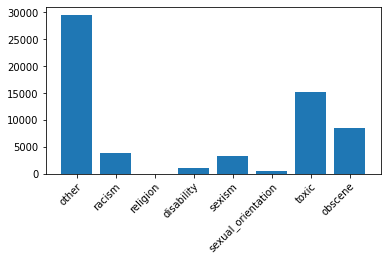

<Figure size 1152x432 with 0 Axes>

In [3]:
def plot_data_distribution(labels_1, label_2):
    total = labels_1.reshape(-1).tolist()
    total.extend(label_2.reshape(-1).tolist())
    bins = sorted(list(set(total)))

    plt.bar(bins, [total.count(bin_val) for bin_val in bins])
    print([total.count(bin_val) for bin_val in bins])
    plt.xticks(bins,
                ["other", "racism", "religion", "disability", "sexism", "sexual_orientation", "toxic", "obscene"],
                rotation=45,
                rotation_mode="anchor",
                ha="right")

    plt.subplots_adjust(bottom=0.3)
    plt.figure(figsize=(16, 6))
    plt.show()

    
plot_data_distribution(train_df['class'].values, test_df['class'].values)

Load datasets without classes 0, 6 and 7 (No or no interesting category)

In [4]:
def load_data_arrays2():
  df_1 = pd.read_csv("../../datasets/1_no_stopwords.csv")
  df_3 = pd.read_csv("../../datasets/3_no_stopwords.csv")
  df_5 = pd.read_csv("../../datasets/5_no_stopwords.csv")
  df_6 = pd.read_csv("../../datasets/6_no_stopwords.csv")

  df = df_1.append(df_3)
  df = df.append(df_5)
  df = df.append(df_6)

  df = df[(df['is_hatespeech'] == 1)]
  df = df[(df['class'] != 0)]
  df = df[(df['class'] != 6)]
  df = df[(df['class'] != 7)]

  train_df, test_df = train_test_split(df, test_size=0.2, random_state=42, shuffle=True, stratify=df["is_hatespeech"])

  return train_df, test_df

train_df, test_df = load_data_arrays2()

Plot distribution

[3865, 68, 1089, 3340, 514]


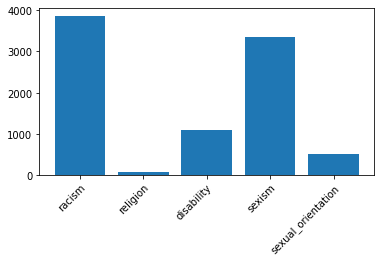

<Figure size 1152x432 with 0 Axes>

In [5]:
def plot_data_distribution2(labels_1, label_2):
    total = labels_1.reshape(-1).tolist()
    total.extend(label_2.reshape(-1).tolist())
    bins = sorted(list(set(total)))

    plt.bar(bins, [total.count(bin_val) for bin_val in bins])
    print([total.count(bin_val) for bin_val in bins])
    plt.xticks(bins,
                ["racism", "religion", "disability", "sexism", "sexual_orientation"],
                rotation=45,
                rotation_mode="anchor",
                ha="right")

    plt.subplots_adjust(bottom=0.3)
    plt.figure(figsize=(16, 6))
    plt.show()

    
plot_data_distribution2(train_df['class'].values, test_df['class'].values)